¡Hola, Jonathan!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Jonathan! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 2</b> <a class="tocSkip"></a>

Hola Jonathan! Has hecho un excelente trabajo con los ajustes, redondeaste las variables de manera perfecta antes de hacer el calculo de ingreso mensual por usuario y ajustaste las pruebas de hipótesis

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<b>Objetivo del proyecto</b><br><br>
    
A través del presente proyecto analizaremos el comportamiento de los clientes suscritos a las dos tarifas de prepago, Surf y Ultimate, generando los resultados que aporten la información necesaria al departamento comercial, con la intensión de aplicar los ajustes necesarios en el presupuesto de publicidad, lo que permitirá un impacto positivo para los recursos para el operador Megaline.
    
Para poder llevar a cabo el análisis de los datos de 500 usuarios, es necesario realizar algunas acciones previas:

- Realizaremos la carga de todas las librerias que nos permitiran realizar un análisis estadístico y gráfico de la información.
- Cargaremos y aplicaremos los ajustes necesarios de validación y limpieza de los datos.
- Crear las representaciones gráficas correspondientes que permitirán un análisis más visual y de fácil lectura para el departamento comercial.
- Realizaremos la comprobación de hipóteisis.
- Emisión de conclusiones generales.
  

## Inicialización

In [134]:
# Cargar todas las librerías

from scipy import stats as st
from scipy.stats import levene
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buen trabajo cargando la libreria de math para el reondeo de las variables
    

## Cargar datos

In [135]:
# Carga los archivos de datos en diferentes DataFrames

df_megaline_calls=pd.read_csv('/datasets/megaline_calls.csv' , sep=',')

df_megaline_internet=pd.read_csv('/datasets/megaline_internet.csv' , sep=',')

df_megaline_messages=pd.read_csv('/datasets/megaline_messages.csv' , sep=',')

df_megaline_plans=pd.read_csv('/datasets/megaline_plans.csv' , sep=',')

df_megaline_users=pd.read_csv('/datasets/megaline_users.csv' , sep=',')

## Preparar los datos

## Tarifas

Consultaremos algunos comandos para revisar como se encuentran estructurada la información de las tarifas de Megaline

In [136]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


<b>Imprimiendo muesta de datos del dataframe de tarifas</b>

In [137]:
# Imprime una muestra de los datos para las tarifas

print(df_megaline_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Revisando la información de las tarifas, podemos identificar que los tipos de datos se encuentran definidos correctamente, así como los nombres de las columnas, no se identifican datos ausentes, ni duplicados.

## Corregir datos

<b>Comprobación de valores ausentes</b><br>

In [138]:
#Comprobando valores ausentes
print(df_megaline_plans.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


## Enriquecer los datos

No se identifican factores adicionales que pudieran ser útiles para los datos.


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
A efecto de realizar los cálculos correctos respecto a las tarifas y el consumo de internet de los usuarios, es necesario realizar la conversión de los megabytes a gigabytes, en caso contrario no contaremos con datos exactos.
Esta transformación de datos se realizará en el apartado  1.12 Internet.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Usuarios/as

A efecto de conocer como se encuentra conformado el dataframe de usuarios ejecuaremos los siguientes comandos:

-Info <br>
-isna para validar si existen valores ausentes <br>
-duplicated

<b>Imprimiendo la información general del dataframe de usuarios</b>

In [139]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("El dataframe df_megaline_users se encuentra diseña de la siguiente manera")
print()
df_megaline_users.info()
print()
print("Los valores ausentes del dataframe df_megaline_users son : \n", df_megaline_users.isna().sum())
print()
duplicate_df_megaline_users =df_megaline_users.duplicated().sum()
print("Los valores duplicados del dataframe df_megaline_users son: ", duplicate_df_megaline_users)

El dataframe df_megaline_users se encuentra diseña de la siguiente manera

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Los valores ausentes del dataframe df_megaline_users son : 
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Los valores duplicados del dataframe df_megaline_users son:  0


<b>Muestra de datos del dataframe de usuarios</b>

In [140]:
# Imprime una muestra de datos para usuarios
print(df_megaline_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


<b>Resultado</b>

Derivado del análisis ejecutando el comando para obtener los valores ausentes, se observa que el campo churn_date existen 466 valores ausentes, que de acuerdo a la descripción inicial del proyecto se debe a que al momento de realizar la extracción de la base de datos, la tarifa se estaba usando; es decir, la línea se encontra activa. Es necesario cambiar el tipo de dato de la columna reg_date ya que se encuentra definida como object y para poder realizar filtrados y cálculos de diferencias de días es mejor contar con este campo en tipo de dato datetime.

### Corregir los datos

<b>Corrigiendo problemas obvios</b>

Es necesario cambiar el tipo de dato del campo reg_date toda vez que siendo object no es posible realizar filtrado o cálculo de diferencias entre fechas, por lo que procedemos a cambiardo a datetime.

In [141]:
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'], format='%Y-%m-%d')
#Comprobar aplicación del tipo de dato
df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-info">
Se agregó el argunto recomendado para ajustar el formato del campo reg_date a datetime, a fin de evitar confusión entre la posición del día y el mes.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

No se identifican valores duplicados, no se identifican valores ausentes relevantes, adicionales a los de la columna churn_Date, se encuentran correctamente definidos los tipos de datos, así  como los nombres de las columnas.

### Enriquecer los datos

In [142]:
df_megaline_users.rename(columns={'plan': 'plan_name'}, inplace=True)

## Llamadas

A efecto de conocer como se encuentra conformado el dataframe de llamadas ejecuaremos los siguientes comandos:

-Info <br>
-isna para validar si existen valores ausentes <br>
-duplicated

In [143]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("El dataframe df_megaline_calls se encuentra diseña de la siguiente manera")
print()
df_megaline_calls.info()
print()
print("Los valores ausentes del dataframe df_megaline_calls son : \n", df_megaline_calls.isna().sum())
print()
duplicate_df_megaline_calls =df_megaline_calls.duplicated().sum()
print("Los valores duplicados del dataframe df_megaline_calls son: ", duplicate_df_megaline_users)

El dataframe df_megaline_calls se encuentra diseña de la siguiente manera

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Los valores ausentes del dataframe df_megaline_calls son : 
 id           0
user_id      0
call_date    0
duration     0
dtype: int64

Los valores duplicados del dataframe df_megaline_calls son:  0


<div class="alert alert-block alert-info">
Se aplica el redondeo de duración de llamadas a fin de no interferir con los valores de llamadas que se utilizarán más adelante en el cálculo de tarifas y representación de datos gráficos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [144]:
#Redondeo superior de la duración de llamadas
df_megaline_calls['duration'] = np.ceil(df_megaline_calls['duration'])
print(df_megaline_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27       9.0
1  1000_145     1000  2018-12-27      14.0
2  1000_247     1000  2018-12-27      15.0
3  1000_309     1000  2018-12-28       6.0
4  1000_380     1000  2018-12-30       5.0


<b>Imprimiendo una muestra de los datos de llamadas</b>

In [145]:
# Imprime una muestra de datos para las llamadas
print(df_megaline_calls.head())
print()

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27       9.0
1  1000_145     1000  2018-12-27      14.0
2  1000_247     1000  2018-12-27      15.0
3  1000_309     1000  2018-12-28       6.0
4  1000_380     1000  2018-12-30       5.0



Analizando la información correspondiente a las llamadas, no se identificaron valores ausentes, ni valores duplicados, se identificó que el tipo de dato del id se encuentra definido como object, sin embargo, se observa que se compone por un valor que conformado por user_id, guión bajo y el call_id.Si separáramos los caracteres de este campo, los datos no serían consistentes, debido a que el dato de call_id se repite para cada user_id, es decir el id 1000 tiene llamada 1, 2, 3, 4 y el usuario 1001 tiene llamada 1, 2, 3, 4; por lo que nos saldrían falsos valores duplicados. Es necesario cambiar el tipo de dato del campo call_date a datetime para poder realizar filtrado y cálculo de diferencias.

### Corregir los datos

<b>Corrigiendo problemas obvios</b>

Aplicaremos los pasos necesarios para que el campo call_date cambie de object a datetime.

In [146]:
#Cambiando el tipo de dato de call_date.
df_megaline_calls ['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])
#Creando la columna month
df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month
#Agregando la columna plan_name 
df_megaline_calls = pd.merge(df_megaline_calls, df_megaline_users[['user_id', 'plan_name']], on='user_id', how='left')
print()
#Comprobar aplicación del cambio de tipo de dato
print("Ejecución del comando info() para validar la aplicación del cambio de tipo de dato")
print()
df_megaline_calls.info()


Ejecución del comando info() para validar la aplicación del cambio de tipo de dato

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
 5   plan_name  137735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 7.4+ MB


### Enriquecer los datos

No se identifican factores adicionales que pudieran ser útiles para los datos.

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

In [147]:
zero_duration_calls = df_megaline_calls[df_megaline_calls['duration'] == 0]

#Imprime los primeros 10 registros
print(zero_duration_calls.head(10))

         id  user_id  call_date  duration  month plan_name
19   1001_4     1001 2018-12-05       0.0     12      surf
25  1001_13     1001 2018-12-24       0.0     12      surf
31  1001_30     1001 2018-10-17       0.0     10      surf
32  1001_31     1001 2018-11-03       0.0     11      surf
34  1001_35     1001 2018-12-21       0.0     12      surf
39  1001_43     1001 2018-12-13       0.0     12      surf
44  1001_52     1001 2018-11-23       0.0     11      surf
45  1001_53     1001 2018-10-24       0.0     10      surf
49  1001_60     1001 2018-12-16       0.0     12      surf
61  1001_84     1001 2018-10-07       0.0     10      surf


<div class="alert alert-block alert-info">
De las llamadas en 0 podemos decir que no se están considerando para el record de llamadas realizadas por esos usuarios, toda vez que no es posible asignar una tarifa si el contador está en 0, por lo que podemos proceder a eliminarlas, al no aportar datos para el análisis que estamos realizando.
    
</div>

In [148]:

#Nos quedamos solo con las llamadas diferentes a 0
df_megaline_calls = df_megaline_calls.query('duration != 0.0')

# Mostrar el DataFrame resultante
print(df_megaline_calls.head())


         id  user_id  call_date  duration  month plan_name
0   1000_93     1000 2018-12-27       9.0     12  ultimate
1  1000_145     1000 2018-12-27      14.0     12  ultimate
2  1000_247     1000 2018-12-27      15.0     12  ultimate
3  1000_309     1000 2018-12-28       6.0     12  ultimate
4  1000_380     1000 2018-12-30       5.0     12  ultimate


## Mensajes

A efecto de conocer como se encuentra conformado el dataframe de mensajes ejecuaremos los siguientes comandos:

-Info <br>
-isna para validar si existen valores ausentes <br>
-duplicated

In [149]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print("El dataframe df_megaline_messages se encuentra diseñado de la siguiente manera")
print()
df_megaline_messages.info()
print()
print("Los valores ausentes del dataframe df_megaline_messages son : \n", df_megaline_messages.isna().sum())
print()
duplicate_df_megaline_messages =df_megaline_messages.duplicated().sum()
print("Los valores duplicados del dataframe df_megaline_messages son: ", duplicate_df_megaline_messages)

El dataframe df_megaline_messages se encuentra diseñado de la siguiente manera

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

Los valores ausentes del dataframe df_megaline_messages son : 
 id              0
user_id         0
message_date    0
dtype: int64

Los valores duplicados del dataframe df_megaline_messages son:  0


In [150]:
# Imprime una muestra de datos para los mensajes

print(df_megaline_messages.head(10))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


No existen valores ausentes ni duplicados, así como los nombres de las columnas, es necesario cambiar el tipo de dato del campo message_date, está definido como object pero convertirlo a datetime permitirá realizar cálculos más precisos con las fechas.

### Corregir los datos

<b>Corrigiendo problemas obvios</b>

In [151]:
df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'])
#Comprobar la aplicación del cambio

df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

No se identifican factores adicionales que pudieran ser útiles para los datos.

## Internet

In [152]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [153]:
# Imprime una muestra de datos para el tráfico de internet
print(df_megaline_internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Para contar con los datos en la estructura correcta, es necesario cambiar el tipo de dato del campo session_date de object a datetime.

### Corregir los datos

<b>Corrigiendo problemas obvios</b>

In [154]:
df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'])
#Comprobar la aplicación del tipo de dato
#Info
df_megaline_internet.info()
#Imprime muestra
print(df_megaline_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


### Enriquecer los datos

<div class="alert alert-block alert-info">
Aquí se redondean los valores de mb_used
    
</div>

In [155]:
#Redondeo de MB
df_megaline_internet['mb_used'] = np.ceil(df_megaline_internet['mb_used'])
#Imprime muestra
print(df_megaline_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29     90.0
1  1000_204     1000   2018-12-31      0.0
2  1000_379     1000   2018-12-28    661.0
3  1000_413     1000   2018-12-26    271.0
4  1000_442     1000   2018-12-27    881.0


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
De las llamadas en 0 podemos decir que no se están considerando para el record de llamadas realizadas por esos usuarios, toda vez que no es posible asignar una tarifa si el contador está en 0, por lo que podemos proceder a eliminarlas, al no aportar datos para el análisis que estamos realizando.
    
</div>

## Estudiar las condiciones de las tarifas

Se estudian las condiciones de las tarifas a efecto de contar con información respecto a los cálculos que realizaremos en pasos posteriores.

In [157]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_megaline_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


El plan surf cuenta con una tarifa de 20 dólares al mes:

Incluye 500 minutos de llamadas 
50 mensajes
15,360 MB 
GB adicional 10 dólares
3 centavos el mensaje adicional
3 centavos el segundo adicional

El plan ultimate cuenta con una tarifa de 70 dólares al mes:

Incluye 3,000 minutos de llamadas
1000 mensajes
30,720 MB
GB adicional 7 dólares
1 centavo el mensaje adicional
1 centavo el minuto adicional

## Agregar datos por usuario


En este punto se combinan los dataframes con el objetivo de contar con un solo dataframe con la información respecto a las llamadas realizadas, mensajes enviados y consumo de internet.

<div class="alert alert-block alert-info">
Aplicando groupby
</div>

In [158]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#Agregamos la columna month obteniendo este valor del campo call_date
df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month
#Imprimimos el nuevo df con el groupby y el mes
call_counts = df_megaline_calls.groupby(['user_id','month']).size().reset_index(name='number_of_calls')
print(call_counts)


      user_id  month  number_of_calls
0        1000     12               16
1        1001      8               22
2        1001      9               38
3        1001     10               47
4        1001     11               49
...       ...    ...              ...
2251     1498     12               32
2252     1499      9               35
2253     1499     10               41
2254     1499     11               39
2255     1499     12               56

[2256 rows x 3 columns]


<div class="alert alert-block alert-info">
Se aplica el ejercicio de acuerdo a la recomendación con pivot_table
</div>

In [159]:
 pivot_calls = df_megaline_calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()
print(pivot_calls.head(20))

   user_id month      sum    count
                 duration duration
0     1000    12    124.0       16
1     1001     8    182.0       22
2     1001     9    315.0       38
3     1001    10    393.0       47
4     1001    11    426.0       49
5     1001    12    412.0       46
6     1002    10     59.0        8
7     1002    11    386.0       48
8     1002    12    384.0       38
9     1003    12   1104.0      118
10    1004     5    193.0       19
11    1004     6    275.0       33
12    1004     7    381.0       45
13    1004     8    354.0       42
14    1004     9    301.0       32
15    1004    10    365.0       47
16    1004    11    476.0       45
17    1004    12    427.0       43
18    1005    12    496.0       50
19    1006    11     10.0        2



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-info">
Se aplica el ejercicio de acuerdo a la recomendación
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [160]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
total_duration = df_megaline_calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='total_minutes')
print()
print(total_duration)


      user_id  month  total_minutes
0        1000     12          124.0
1        1001      8          182.0
2        1001      9          315.0
3        1001     10          393.0
4        1001     11          426.0
...       ...    ...            ...
2251     1498     12          339.0
2252     1499      9          346.0
2253     1499     10          385.0
2254     1499     11          308.0
2255     1499     12          496.0

[2256 rows x 3 columns]


In [161]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#df_megaline_messages['number_of_messages'] = df_megaline_messages['number_of_messages'].fillna(0)
df_megaline_messages['month'] = df_megaline_messages['message_date'].dt.month
messages_counts = df_megaline_messages.groupby(['user_id','month']).size().reset_index(name='number_of_messages')

print(messages_counts)

      user_id  month  number_of_messages
0        1000     12                  11
1        1001      8                  30
2        1001      9                  44
3        1001     10                  53
4        1001     11                  36
...       ...    ...                 ...
1801     1496      9                  21
1802     1496     10                  18
1803     1496     11                  13
1804     1496     12                  11
1805     1497     12                  50

[1806 rows x 3 columns]


In [162]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_megaline_internet['month'] = df_megaline_internet['session_date'].dt.month
mb_counts = df_megaline_internet.groupby(['user_id','month']).size().reset_index(name='gb_used')

print(mb_counts)

      user_id  month  gb_used
0        1000     12        5
1        1001      8       25
2        1001      9       53
3        1001     10       56
4        1001     11       51
...       ...    ...      ...
2272     1498     12       65
2273     1499      9       45
2274     1499     10       61
2275     1499     11       49
2276     1499     12       65

[2277 rows x 3 columns]


Se junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [163]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_consum_per_user = (call_counts
                      .merge(total_duration, on=['user_id', 'month'], how='left')
                      .merge(messages_counts, on=['user_id', 'month'], how='left')
                      .merge(mb_counts, on=['user_id', 'month'], how='left'))

df_merged = df_consum_per_user.merge(df_megaline_users[['user_id', 'plan_name']], on='user_id', how='left')
df_merged.rename(columns={'plan': 'plan_name'}, inplace=True)
df_merged['number_of_messages'] = df_merged['number_of_messages'].fillna(0)

print(df_merged)

      user_id  month  number_of_calls  total_minutes  number_of_messages  \
0        1000     12               16          124.0                11.0   
1        1001      8               22          182.0                30.0   
2        1001      9               38          315.0                44.0   
3        1001     10               47          393.0                53.0   
4        1001     11               49          426.0                36.0   
...       ...    ...              ...            ...                 ...   
2251     1498     12               32          339.0                 0.0   
2252     1499      9               35          346.0                 0.0   
2253     1499     10               41          385.0                 0.0   
2254     1499     11               39          308.0                 0.0   
2255     1499     12               56          496.0                 0.0   

      gb_used plan_name  
0         5.0  ultimate  
1        25.0      surf  
2        

In [164]:
# Añade la información de la tarifa
df_with_tariff = df_merged.merge(df_megaline_plans[['plan_name', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message','usd_per_minute']], on='plan_name', how='left')

print(df_with_tariff.head())

   user_id  month  number_of_calls  total_minutes  number_of_messages  \
0     1000     12               16          124.0                11.0   
1     1001      8               22          182.0                30.0   
2     1001      9               38          315.0                44.0   
3     1001     10               47          393.0                53.0   
4     1001     11               49          426.0                36.0   

   gb_used plan_name  messages_included  mb_per_month_included  \
0      5.0  ultimate               1000                  30720   
1     25.0      surf                 50                  15360   
2     53.0      surf                 50                  15360   
3     56.0      surf                 50                  15360   
4     51.0      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500       

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [165]:


# Calcular las diferencias
df_with_tariff['excess_minutes'] = df_with_tariff['total_minutes'] - df_with_tariff['minutes_included']
df_with_tariff['excess_messages'] = df_with_tariff['number_of_messages'] - df_with_tariff['messages_included']
df_with_tariff['excess_data'] = df_with_tariff['gb_used'] - df_with_tariff['mb_per_month_included']

# Reemplazar valores negativos con 0 (ya que no puede haber exceso negativo)
df_with_tariff['excess_minutes'] = df_with_tariff['excess_minutes'].clip(lower=0)
df_with_tariff['excess_messages'] = df_with_tariff['excess_messages'].clip(lower=0)
df_with_tariff['excess_data'] = df_with_tariff['excess_data'].clip(lower=0)

# Imprimir el DataFrame con las nuevas columnas
print(df_with_tariff[['user_id', 'month', 'excess_minutes', 'excess_messages', 'excess_data']].head(30))

    user_id  month  excess_minutes  excess_messages  excess_data
0      1000     12             0.0              0.0          0.0
1      1001      8             0.0              0.0          0.0
2      1001      9             0.0              0.0          0.0
3      1001     10             0.0              3.0          0.0
4      1001     11             0.0              0.0          0.0
5      1001     12             0.0              0.0          0.0
6      1002     10             0.0              0.0          0.0
7      1002     11             0.0              0.0          0.0
8      1002     12             0.0              0.0          0.0
9      1003     12           604.0              0.0          0.0
10     1004      5             0.0              0.0          0.0
11     1004      6             0.0              0.0          0.0
12     1004      7             0.0              0.0          0.0
13     1004      8             0.0              0.0          0.0
14     1004      9       

En esta etapa se realiza el cálculo de las tarifas excedentes generadas por cada usuario en los distintos rubros del plan, minutos de llamadas, mensajes enviados y navegación; así como el cálculo del pago total del plan, es decir las tarifas de 20 y 70 dólares + los gastos excedentes.

<div class="alert alert-block alert-info">
Se aplica el redondeo de consumo de internet a fin de no interferir con los valores de consumo que se utilizarán más adelante en el cálculo de tarifas y representación de datos gráficos.
</div>

In [166]:
#Aplicando el redondeo de GB previo al cálculo del costo mensual
df_with_tariff['gb_used'] = np.ceil(df_with_tariff['gb_used'])
#Imprime el head para visualizar el cambio
print(df_with_tariff.head())


   user_id  month  number_of_calls  total_minutes  number_of_messages  \
0     1000     12               16          124.0                11.0   
1     1001      8               22          182.0                30.0   
2     1001      9               38          315.0                44.0   
3     1001     10               47          393.0                53.0   
4     1001     11               49          426.0                36.0   

   gb_used plan_name  messages_included  mb_per_month_included  \
0      5.0  ultimate               1000                  30720   
1     25.0      surf                 50                  15360   
2     53.0      surf                 50                  15360   
3     56.0      surf                 50                  15360   
4     51.0      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           7             0.01   
1               500       

In [167]:
# Calcula el ingreso mensual para cada usuario


# Calcular costos adicionales
def calculate_additional_costs(row):
    # Costo por exceso de minutos
    cost_minutes = row['excess_minutes'] * row['usd_per_minute']
    
    # Costo por exceso de mensajes
    cost_messages = row['excess_messages'] * row['usd_per_message']
    
    # Costo por exceso de datos (convertir MB a GB)
    cost_data = (row['excess_data'] / 1024) * row['usd_per_gb']  # Convertir MB a GB
    
    # Costo total
    total_cost = cost_minutes + cost_messages + cost_data + row['usd_monthly_pay']
    return total_cost

# Aplicar la función a cada fila del DataFrame
df_with_tariff['total_monthly_cost'] = df_with_tariff.apply(calculate_additional_costs, axis=1)

# Imprimir el DataFrame con los costos totales
df_with_tariff.fillna(0, inplace=True)

#df_with_tariff['total_monthly_cost'] = np.ceil(df_with_tariff['total_monthly_cost'])
print(df_with_tariff[['user_id', 'month', 'excess_minutes', 'excess_messages', 'excess_data','total_monthly_cost']].head(10))

   user_id  month  excess_minutes  excess_messages  excess_data  \
0     1000     12             0.0              0.0          0.0   
1     1001      8             0.0              0.0          0.0   
2     1001      9             0.0              0.0          0.0   
3     1001     10             0.0              3.0          0.0   
4     1001     11             0.0              0.0          0.0   
5     1001     12             0.0              0.0          0.0   
6     1002     10             0.0              0.0          0.0   
7     1002     11             0.0              0.0          0.0   
8     1002     12             0.0              0.0          0.0   
9     1003     12           604.0              0.0          0.0   

   total_monthly_cost  
0               70.00  
1               20.00  
2               20.00  
3               20.09  
4               20.00  
5               20.00  
6               20.00  
7               20.00  
8               20.00  
9               38.12 

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
Se aplica el redondeo de consumo de internet y duraciónd de llamadas a fin de no interferir con los valores de consumo que se utilizarán más adelante en el cálculo de tarifas y representación de datos gráficos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

### Llamadas

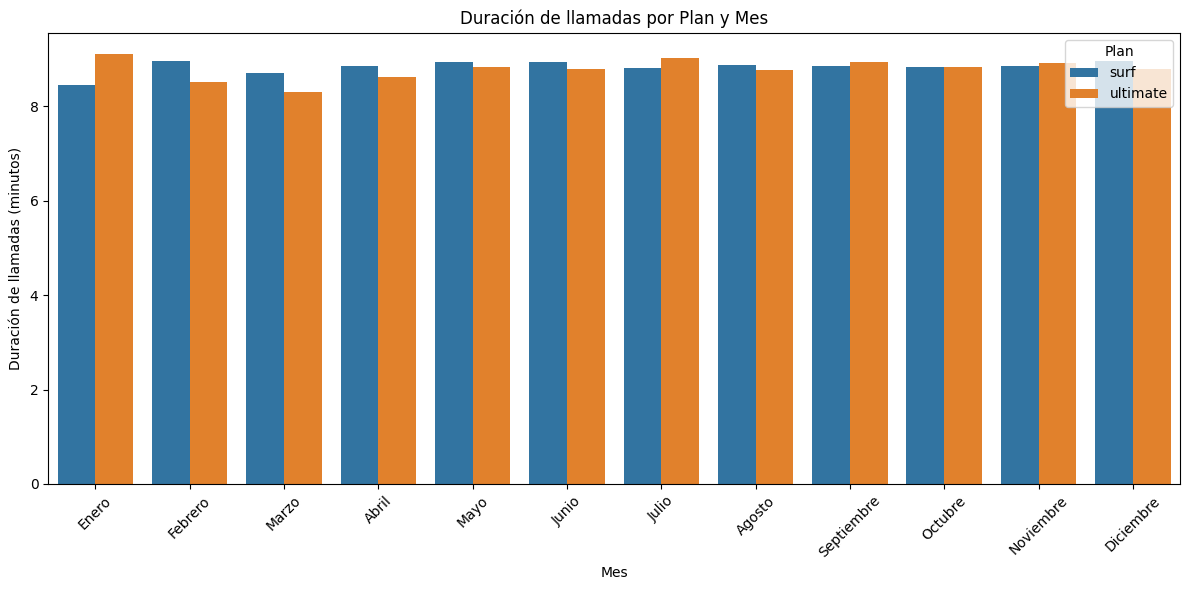

In [168]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_duration = df_megaline_calls.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

#Cambiar los meses de número a texto para mejor visualización en el gráfico
df_megaline_calls['month'] = df_megaline_calls['month'].astype(object)
df_megaline_calls['month'] = df_megaline_calls['month'].replace({
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
})

ordered_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                  'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_megaline_calls['month'] = pd.Categorical(df_megaline_calls['month'], categories=ordered_months, ordered=True)

avg_duration = df_megaline_calls.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

# Trazar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='month', y='duration', hue='plan_name')

# Configurar el título y las etiquetas
plt.title('Duración de llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración de llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

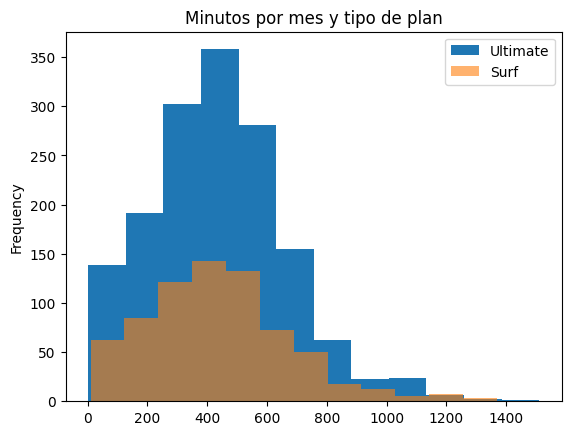

In [169]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Filtrar los datos por plan
df_surf = df_with_tariff[df_with_tariff['plan_name'] == "surf"]
df_ultimate = df_with_tariff[df_with_tariff['plan_name'] == "ultimate"]

# Agrupar por mes y sumar los minutos totales
surf_minutes = df_surf.groupby('month')['total_minutes'].sum()
ultimate_minutes = df_ultimate.groupby('month')['total_minutes'].sum()

df_surf['total_minutes'].plot(kind='hist',
                      bins=12,
                      title='Minutos por mes y tipo de plan',
                      ylabel='Minutos')

df_ultimate['total_minutes'].plot(kind='hist', bins=12, alpha=0.6)



plt.legend(['Ultimate', 'Surf'])
plt.show()

A continuación se calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

<b>Diagrama de caja para visualizar la duración de las llamadas </b>

<AxesSubplot:xlabel='duration'>

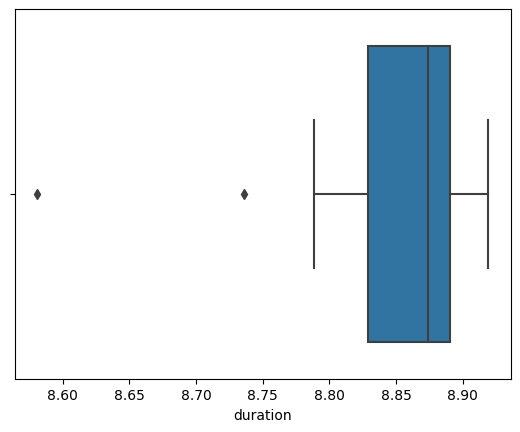

In [170]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
monthly_duration = df_megaline_calls.groupby('month')['duration'].mean()

# Crear el diagrama de caja
sns.boxplot(monthly_duration)


<b>Conclusiones del análisis de llamadas</b>

Derivado del análisis del la duración de llamadas, podemos observar en la gráfica de barras que el promedio de la duración de las llamadas de manera mensual, es superior a 8 minutos y menor a 9 minutos para ambos planes, no se visualiza una diferencia importante comparando un plan con otro, los usuarios por lo general realizan llamadas con duraciones muy aproximadas. Este punto lo podemos confirmar, a través del diagrama de caja, en el que se observa la misma tendencia entre 8.70 y 8.90 minutos por llamada. Adicionalmente, realizamos la comparación de los minutos de llamadas utilizados por por usuarios de ambos planes, sin embargo podemos apreciar que los usuarios del plan ultimate, utilizaron un mayor número de minutos en comparación con los usuarios del plan surf.

El punto más alto lo encontramos en 350 usuarios que utilizaron en promedio 400 minutos en el mes de abril, a simple vista en el total de los meses, es muy fácil apreciar que la diferencia es significativamente superior al doble de minutos, considerando que en el plan surf se cuenta con 500 minutos, y en el plan ultimate con 3,000.

Esto también nos permite visualizar que los minutos del plan ultimate se encuentran excedidos, toda vez que existe poca probabilidad de que se alcance  el total de minutos que ofrece la empresa en este paquete.

Si nos enfocamos en el plan surf, podemo apreciar que es el plan que produce mayores ingresos adicionales a la tarifa mensual por concepto de llamadas, ya que existen usuarios que excedente de los 500 minutos que incluye el paquete. 

### Mensajes

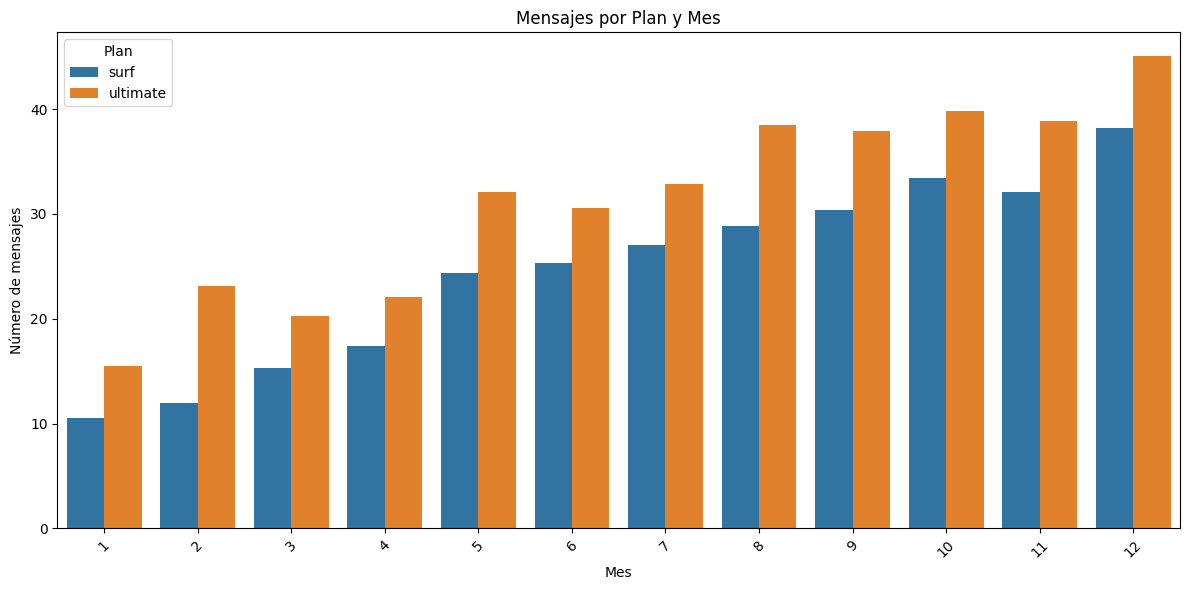

In [171]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

avg_messages = df_with_tariff.groupby(['plan_name', 'month'])['number_of_messages'].mean().reset_index()


#avg_messages['month'] = avg_messages['month'].astype(object)
#ordered_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                  #'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#avg_messages['month'] = pd.Categorical(avg_messages['month'], categories=ordered_months, ordered=True)

#avg_messages = avg_messages.groupby(['plan_name', 'month'])['number_of_messages'].mean().reset_index()
# Trazar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages, x='month', y='number_of_messages', hue='plan_name')

# Configurar el título y las etiquetas
plt.title('Mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

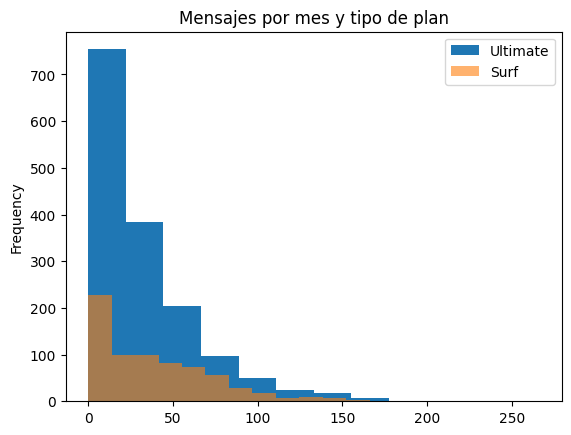

In [172]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf = df_with_tariff[df_with_tariff['plan_name'] == "surf"]
df_ultimate = df_with_tariff[df_with_tariff['plan_name'] == "ultimate"]

# Agrupar por mes y sumar los mensajes totales
surf_messages = df_surf.groupby('month')['number_of_messages'].sum()

ultimate_messages = df_ultimate.groupby('month')['number_of_messages'].sum()

df_surf['number_of_messages'].plot(kind='hist',
                      bins=12,
                      title='Mensajes por mes y tipo de plan',
                      ylabel='Mensajes')

df_ultimate['number_of_messages'].plot(kind='hist', bins=12, alpha=0.6)



plt.legend(['Ultimate', 'Surf'])
plt.show()

In [173]:
#Calcula la media y la varianza de mensajes enviados

monthly_messages = df_with_tariff.groupby('month')['number_of_messages'].sum()

# Calcular la media
mean = np.mean(monthly_messages)
print("La media es: ", mean)
#Calcular la varianza
variance = np.var(monthly_messages)
print("La varianza es: ", variance)


La media es:  6219.5
La varianza es:  33282810.916666668


<b>Conclusiones de mensajes</b>

El comportamiento de los usuarios de los planes surf y ultimate, respecto a los mensajes enviados es el siguiente:

los usuarios de ambos paquetes, envían un promedio de 40 mensajes de manera mensual, también podemos observar que existen usuarios en ambos paquetes que no envían mensajes, siendo estos los más representativos. Por lo anterior, se puede ajustar el número de mensajes incluidos en los paquetes, toda vez que no son utilizados al máximo. El promedio de mensajes monstrado en la gráfica de barras llega a ser ligeramente superior para el plan últimate.

### Internet

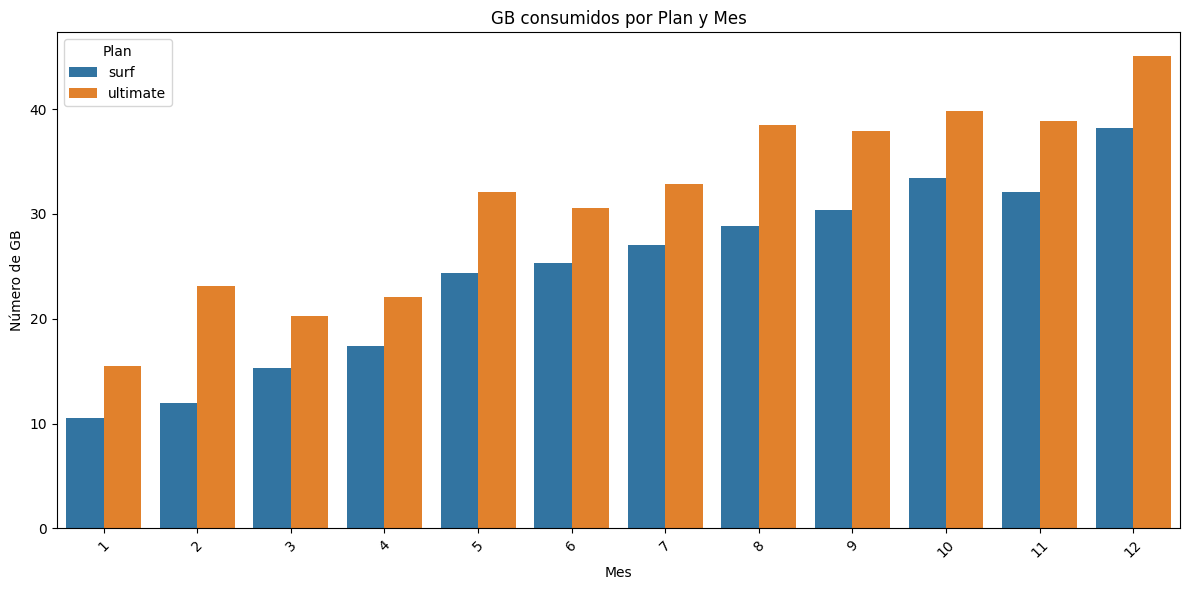

In [174]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

avg_gb = df_with_tariff.groupby(['plan_name', 'month'])['gb_used'].sum().reset_index()
#print(avg_gb.head(24))

#ordered_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                  #'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
#df_with_tariff['month'] = pd.Categorical(df_with_tariff['month'], categories=ordered_months, ordered=True)

#avg_gb = df_with_tariff.groupby(['plan_name', 'month'])['gb_used'].mean().reset_index()
# Trazar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages, x='month', y='number_of_messages', hue='plan_name')

# Configurar el título y las etiquetas
plt.title('GB consumidos por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de GB')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

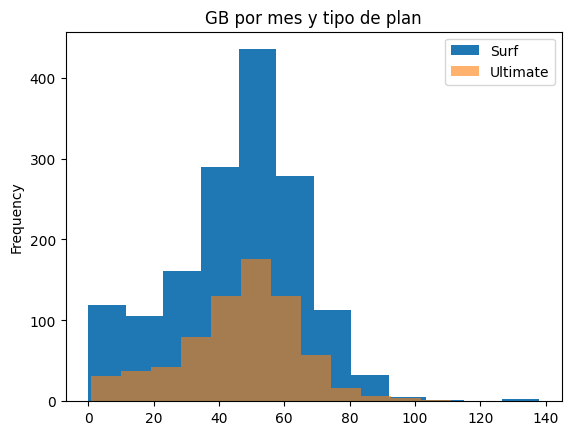

In [175]:
# Compara el número de gb mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf = df_with_tariff[df_with_tariff['plan_name'] == "surf"]
df_ultimate = df_with_tariff[df_with_tariff['plan_name'] == "ultimate"]

# Agrupar por mes y sumar los minutos totales
surf_minutes = df_surf.groupby('month')['gb_used'].sum()
ultimate_minutes = df_ultimate.groupby('month')['gb_used'].sum()

df_surf['gb_used'].plot(kind='hist',
                      bins=12,
                      title='GB por mes y tipo de plan',
                      ylabel='GB')

df_ultimate['gb_used'].plot(kind='hist', bins=12, alpha=0.6)



plt.legend(['Surf', 'Ultimate'])
plt.show()

In [180]:
#Calcula la media y la varianza de GB usados

sum_gb = df_with_tariff.groupby(['plan_name', 'month'])['gb_used'].sum().reset_index()

# Calcular la media
mean = np.mean(sum_gb['gb_used'])
print("La media es: ", mean)
#Calcular la varianza
variance = np.var(sum_gb['gb_used'])
print("La varianza es: ", variance)


La media es:  4314.916666666667
La varianza es:  17352620.15972222


<b>Conclusiones consumo de internet<b/>


 Observando la gráfica de barras podemos obtener la siguiente información:
 
 El consumo de internet es ligeramente superior por parte de los usuarios del plan Ultimate, alrededor de 10 al 15 % de manera mensual.
 A partir del tercer trimestre del año el consumo de internet tiene un incremento sostenido de entre 27 y 37 GB mensuales para los usuarios del plan Surf y de 37 a 45 GB para los usuarios del plan Ultimate.
 
 Adicionalmente encontramos que el consumo promedio observado en el histograma, es muy similiar concentrando la mayoría de la frecuencia entre 40 y 60 GB.
 
 Por lo que se puede concluir que los hábitos de consumo de internet entre los usuarios de ambos planes y en gran medida muy similiar, no existen diferencias significativas.

## Ingreso

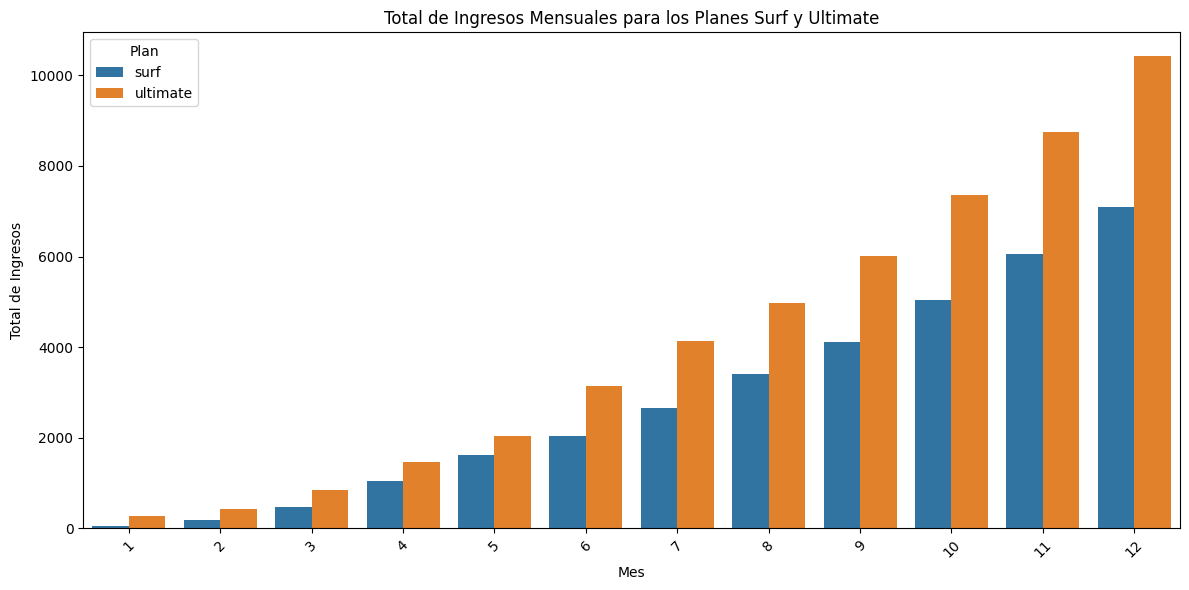

In [177]:

# Agrupar por 'month' y 'plan_name', y sumar el total de ingresos
monthly_income = df_with_tariff.groupby(['month', 'plan_name'])['total_monthly_cost'].sum().reset_index()
#Imprime la tabla de datos
#print(monthly_income)

# Definir el orden de los meses
#ordered_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                  #'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Asegurarse de que la columna 'month' sea categórica y ordenada
#monthly_income['month'] = pd.Categorical(monthly_income['month'], categories=ordered_months, ordered=True)

# Trazar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_income, x='month', y='total_monthly_cost', hue='plan_name')

# Configurar el título y las etiquetas
plt.title('Total de Ingresos Mensuales para los Planes Surf y Ultimate')
plt.xlabel('Mes')
plt.ylabel('Total de Ingresos')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<b>Conclusiones de ingresos</b><br>

Analizando el gráfico de barras anterior, podemos apreciar la diferencia de ingresos que produce cada plan, en cada mes del año podemos apreciar que las ganancias que genera el plan ultimate en cada uno de los meses son superiores en un porcentaje mínimo a las que genera el plan surf. Por lo que es recomendable generar una mayor inversión en la publicidad del plan Surf, a efecto de generar un equilibrio y captar un mayor número de usuarios mediante las campañas publicitarias.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

<b>Hipótesis nula y alternativa</b>

In [178]:
# Prueba las hipótesis

# Separar los ingresos por plan
surf_income = monthly_income[monthly_income['plan_name'] == 'surf']['total_monthly_cost']
ultimate_income = monthly_income[monthly_income['plan_name'] == 'ultimate']['total_monthly_cost']

# Definir el nivel de significación
alpha = 0.05  # Nivel de significación

# Realizar la prueba t de Student para muestras independientes
results = st.ttest_ind(surf_income, ultimate_income, equal_var = False)

# Prueba unilateral: el valor p se divide en dos
p_value = results.pvalue / 2  # Para una prueba unilateral

# Imprimir el valor p
print('valor-p: ', p_value)

# Decisión sobre la hipótesis nula
if p_value < alpha and surf_income.mean() == ultimate_income.mean():
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula. No existe una diferencia significativa")

valor-p:  0.13808798921349125
No podemos rechazar la hipótesis nula. No existe una diferencia significativa



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
Se aplicó el parámetro equal_var=False en la función stats.ttest_ind
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Los ingresos de los planes Surf y Ultimate son muy similares, no hay una diferencia significativa entre los ingresos que genera uno y otro, es apenas del 12.72%

<b>Prueba de hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.</b>

<b>Hipótesis nula y alternativa</b>

In [179]:
# Agrega el área que estragimos del dataframe df_megaline_users para obtener el área del campo city
df_with_tariff['area'] = df_megaline_users['city'].str.split(',').str[1].str.strip()
#print(df_with_tariff.head())

# Filtrar los datos
ny_nj_users = df_with_tariff[df_with_tariff['area'] == 'NY-NJ-PA MSA']
other_users = df_with_tariff[df_with_tariff['area'] != 'NY-NJ-PA MSA']

# Calcular costos mensuales promedio
mean_ny_nj = ny_nj_users['total_monthly_cost'].mean()
mean_other = other_users['total_monthly_cost'].mean()

# Realizar la prueba t
t_stat, p_value = st.ttest_ind(ny_nj_users['total_monthly_cost'], other_users['total_monthly_cost'], equal_var=False)

# Resultados
print(f"Costo mensual promedio NY-NJ: ", mean_ny_nj)
print(f"Costo mensual promedio otras regiones: ", mean_other)
print(f"Estadístico t: ",  t_stat, "Valor p: ", p_value)

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los costos mensuales.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en los costos mensuales.")

print()
print()
#Prueba Levene

statistic, p_value = levene(ny_nj_users['total_monthly_cost'], other_users['total_monthly_cost'])

# Mostrar los resultados
print(f'Prueba de Levene: {statistic}')
print(f'Valor p: {p_value}')

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")
else:
    print("No rechazamos la hipótesis nula: las varianzas son iguales.")


Costo mensual promedio NY-NJ:  39.206875000000004
Costo mensual promedio otras regiones:  36.98324448529412
Estadístico t:  0.8331083238670539 Valor p:  0.40713229080055824
No rechazamos la hipótesis nula: no hay una diferencia significativa en los costos mensuales.


Prueba de Levene: 0.4697478275757337
Valor p: 0.4931736817213165
No rechazamos la hipótesis nula: las varianzas son iguales.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo desarrollando la prueba de hipótesis. Solamente te recomendaría que para robustecer el análisis desarrolles una prueba de levene que te ayude a probar el supuesto de las varianzas iguales.

<div class="alert alert-block alert-info">
Se realizó la prueba de Levene para complementar el supuesto de las varianzas iguales.
</div>

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Los usuarios de la zona NY-NJ pagan en promedio 39.01 dólares por la tarifa del plan, el resto de los usuarios de otras zonas pagan un promedio de 36.72 dólares mensuales, si bien existe una diferencia de aproximadamente 3 dólares, no es un valor muy significante, por lo que se puede concluir que el promedio que pagan los usuarios de NY-NJ es prácticamente igual al resto de los usuarios.

## Conclusión general


Una vez realizada la preparación de los datos, limpieza e integración, se obtuvieron las siguientes conclusiones:
    
Para todos los rubros que conforman el análisis el plan Ultimate es el más representativo para la empresa Megaline:
        
        - El mayor en número de llamdas realizas
        - El mayor en minutos de llamadas
        - El mayor en número de mensajes enviados.
        - El mayor en navegaación de internet
        - El mayor generador de ingresos
        
Si bien las diferencias en algunos rubros son mínimas, sin duda es el producto más redituable para la empresa.
    
Adicionalmente, observamos que además de las tarifas definidas para cada paquete, existe un gran número de usuarios que pagan de manera adicional por consumos excedentes.

Es posible apreciar que el promedio de llamadas es de 6 a 7 minutos para los usuarios de ambos planes, por lo que también se puede concluir que no hay una diferencia en el hábito de llamadas de un plan a otro.

Por último, se concluye que al plan que mayor énfasis publicitario se le debe aplicar es al Ultimate debido aque es el que mayores ingresos genera, pero esto se puede acompañar de campañas para incrementar un poco más los ingresos por concepto del plan Surf.
    
    

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Jonathan, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que redondeamos las variables antes de hacer el calculo de ingresos mensuales por usuario

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar la primer prueba de hipótesis
    
</div>

<div class="alert alert-block alert-info">
Tonatiuh te agradezco ampliamente el tiempo que tomaste para revisar mi proyecto, me han servido mucho tus comentarios para reforzar algunos temas que no tenía tan claros y sin duda las recomendaciones las voy a tener presentes para seguir mejorando.
    
Saludos.
</div>